In [1]:
# import necessary libraries
import pandas as pd
from scipy.io import arff
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# LOADING RICE DATASET
data, meta = arff.loadarff('/content/sample_data/Rice_Cammeo_Osmancik.arff') # loadarff reads ARFF files & returns 2 objects: data & meta
# data is actual rice dataset, meta: Metadata about the dataset: information about attribute names,types, and relation name, as defined in the ARFF file header.

# Step 2: Convert to pandas DataFrame and decode labels
df = pd.DataFrame(data) # converts the data (likely NumPy array into pandas df)

df['Class'] = df['Class'].str.decode('utf-8')  # Convert byte strings to normal strings. NB : Important step
# loadarff reads string attributes, it often stores them as bytes objects in the NumPy array.
# this line decodes the 'Class' column from byte strings to normal Python strings
df.info()


# Step 3: Prepare features and labels
features = df.drop('Class', axis=1)  #features column: contains all the other columns as features except Class column. drop()
# removes the column 'Class' from dataframe while storing the rest in variable x. axis 1: tells panda to drop column not row
#features = df.drop('Class', axis = 1)
label = df['Class'] # selects the column 'Class' as target/label
# label = df['Class]

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)
print("Training data", X_train.shape)
print("Testing data", X_test.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB
Training data (2667, 7)
Testing data (1143, 7)


Confusion Matrix:
[[465  53]
 [ 31 594]]


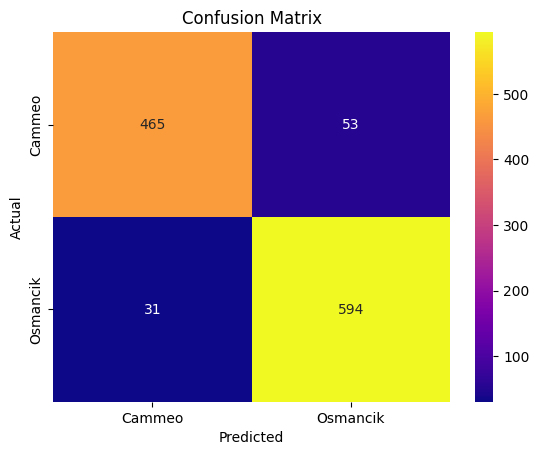


Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.94      0.90      0.92       518
    Osmancik       0.92      0.95      0.93       625

    accuracy                           0.93      1143
   macro avg       0.93      0.92      0.93      1143
weighted avg       0.93      0.93      0.93      1143



In [5]:
# Step 5: Train the model using Random forest classifier(good for classifications)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train) # trains the model on the training data(X_train) and the corresponding labels

# Step 6: Predict
y_pred = model.predict(X_test) #test how model makes predictions on unseen test data

# Step 7: Confusion Matrix
# confusion_matrix() compares the actual labels (y_test) with the model's predicted labels (y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Step 8: Diagram of the Confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='plasma', xticklabels=model.classes_, yticklabels=model.classes_)
# annot = True: displays the numerical values on each cell(TP,FP.TN,FN)
# fmt = 'd': formats the annotations as integers (digits)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 9: Other metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))